In [1]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [16]:
def line_inspect(nb,lb,alg,log_path,write_to_file=True):
    
    mask_left=0
    if alg=='merge':
        mask_left=1 # starts with lb=0 ~ gives error
        
    log_lb=np.log(np.array(lb)[mask_left:])
    log_nb=np.log(np.array(nb)[mask_left:])

    ml=0 # to avoid later confusion with indices
    mr=log_lb.shape[0]-1
    
    while(1):
        
        if mr==log_lb.shape[0]-1:
            
            try: 
                # with np.polyfit line to log(lb)-log(nb) data
                
                params,sse=stats(log_lb[ml:],
                                 log_nb[ml:])
            except:
                if write_to_file:

                    with open(log_path+'alg_t_db.txt','a') as f:
                        f.write('\t'+'nan\tnan'+'\n')
                        
                print('linefit caused problems '+alg+'exited without fit')
                
                return -1
        else:

            try:
                params,sse=stats(log_lb[ml:mr+1],
                                 log_nb[ml:mr+1])

            except:
                
                if write_to_file:
                    with open(log_path+'alg_t_db.txt','a') as f:
                        f.write('\t'+'nan\tnan'+'\n')
                        
                print('linefit caused problems '+alg+'exited without fit')
                
                return -1
            
        print('-------------------------\n'+alg+'\n')
        
        plt.figure()
        plt.scatter(log_lb,log_nb)
        plt.plot([log_lb[ml],log_lb[mr]]
                 ,[params[0]*log_lb[ml]+params[1],params[0]*log_lb[mr]+params[1]])
        
        plt.show()

        print('ok? y/n')

        ok=input()
        
        if ok=='y':
            
            if write_to_file:
                with open(log_path+'alg_t_db.txt','a') as f:
                    f.write('\t'+str(-1*params[0])+'\t'+str(sse)+'\n') # alg and time exec prior to this

                    # save the fig showing the final fit
                    
                    plt.figure()
                    plt.scatter(log_lb,log_nb)
                    plt.plot([log_lb[ml],log_lb[mr]]
                             ,[params[0]*log_lb[ml]+params[1],params[0]*log_lb[mr]+params[1]])
                    
                    try:
                        plt.savefig(log_path+'graphs/'+alg+'.png')
                    except:
                        plt.savefig('linfit'+alg+'.png')
                    plt.show()
                    print('png saved')
            else:
                return params[0]*-1
            
            return 0
            
        else:
            print('new mask left:')
            ml=int(input())
            print('new mask right:')
            nmr=int(input())
            if nmr<0:
                mr=len(lb)+nmr
            else:
                mr=nmr


In [3]:
def stats(x,y):
    
    # assuming numpy arrays
    
    params=np.polyfit(x,y,deg=1,full=True)
    n=x.shape[0]
    sx=np.sum((x-np.mean(x))**2)
    
    sse=np.sqrt(params[1][0]/sx/(n-2))
    
    return (params[0],sse)

In [4]:
import boxes

In [5]:
help(boxes.io_.canonized_lb_bench)

Help on function canonized_lb_bench in module boxes.io_:

canonized_lb_bench(path, alg, lb_alg, rb_alg)



In [7]:
_=boxes.io_.canonized_lb_bench('logs/phd/phd_cbb_benchmark.txt','cbb',['cbb'],[])

In [10]:
lb=[]
nb_mean=[]

for s in _:
    
    size,nbs,exec_times=s
    
    lb.append(size)
    nb_mean.append(np.mean(nbs))
    
    

-------------------------
cbb



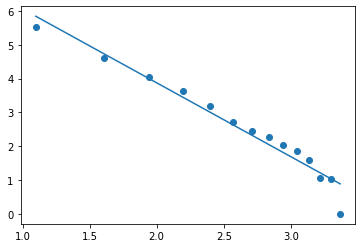

ok? y/n
n
new mask left:
0
new mask right:
-4
-------------------------
cbb



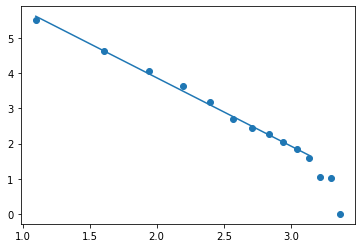

ok? y/n
y


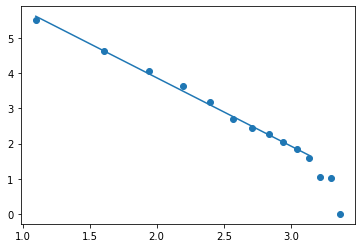

png saved


0

In [17]:
line_inspect(nb_mean,lb,'cbb','linfit_cbb_test',write_to_file=True)